# **Task A – Data Transformation**

# Task A(a) - Load the dataset into a DataFrame.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel('electronics.xlsx')


# Task A(b) - Show the first few rows of the loaded dataset.

In [3]:
# Show the first few rows
print(df.head())


   ProductID ProductCategory  ProductBrand  ProductPrice  CustomerAge  \
0       5874     Smartphones  Other Brands    312.949668           18   
1       5875   Smart Watches       Samsung    980.389404           35   
2       5876         Tablets       Samsung   2606.718293           63   
3       5877     Smartphones       Samsung    870.395450           63   
4       5878         Tablets          Sony   1798.955875           57   

   CustomerGender  PurchaseFrequency  CustomerSatisfaction  PurchaseIntent  
0               0                  2                     1               0  
1               1                  7                     2               1  
2               0                  1                     5               1  
3               1                 10                     3               1  
4               0                 17                     3               0  


# Task A(c) - Apply three operations to handle missing values in the dataset.

In [4]:
# Identify numeric and non-numeric columns
numeric_cols = df.select_dtypes(include='number').columns
non_numeric_cols = df.select_dtypes(exclude='number').columns

# Operation 1: Fill missing values with a specific value (e.g., 0) for numeric columns
df[numeric_cols] = df[numeric_cols].fillna(0)

# Operation 2: Drop rows with missing values (Note: This will drop rows where any column has missing values)
df.dropna(inplace=True)

# Operation 3: Fill missing values with the mean of the column for numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Verify missing values handled
print(df.isnull().sum())


ProductID               0
ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64


# Task A(d) - Choose a column and perform the sorting technique.

In [5]:
# Sort the dataframe by the 'ProductPrice' column
df_sorted = df.sort_values(by='ProductPrice')
print(df_sorted.head())


      ProductID ProductCategory  ProductBrand  ProductPrice  CustomerAge  \
1391       7265         Tablets          Sony    103.784820           65   
1693       7567         Laptops  Other Brands    103.975869           49   
1180       7054      Headphones       Samsung    104.978468           64   
389        6263     Smartphones  Other Brands    105.517297           31   
90         5964         Laptops         Apple    109.289908           37   

      CustomerGender  PurchaseFrequency  CustomerSatisfaction  PurchaseIntent  
1391               1                  7                     5               1  
1693               1                  1                     2               1  
1180               1                  9                     1               1  
389                0                 16                     4               1  
90                 1                 14                     4               1  


# Task A(e) - Define a condition to filter transactions from the dataset.

In [6]:
# Filter transactions where the 'PurchaseFrequency' is greater than 5
filtered_df = df[df['PurchaseFrequency'] > 5]
print(filtered_df.head())


   ProductID ProductCategory ProductBrand  ProductPrice  CustomerAge  \
1       5875   Smart Watches      Samsung    980.389404           35   
3       5877     Smartphones      Samsung    870.395450           63   
4       5878         Tablets         Sony   1798.955875           57   
5       5879     Smartphones      Samsung    373.148325           37   
7       5881     Smartphones           HP    780.101494           35   

   CustomerGender  PurchaseFrequency  CustomerSatisfaction  PurchaseIntent  
1               1                  7                     2               1  
3               1                 10                     3               1  
4               0                 17                     3               0  
5               1                  8                     1               1  
7               0                 12                     5               1  


# Task A(f) - Create a new column to derive additional information.

In [7]:
# Create a new column 'Value per Purchase' derived from 'ProductPrice' / 'PurchaseFrequency'
df['Value per Purchase'] = df['ProductPrice'] / df['PurchaseFrequency']
print(df.head())


   ProductID ProductCategory  ProductBrand  ProductPrice  CustomerAge  \
0       5874     Smartphones  Other Brands    312.949668           18   
1       5875   Smart Watches       Samsung    980.389404           35   
2       5876         Tablets       Samsung   2606.718293           63   
3       5877     Smartphones       Samsung    870.395450           63   
4       5878         Tablets          Sony   1798.955875           57   

   CustomerGender  PurchaseFrequency  CustomerSatisfaction  PurchaseIntent  \
0               0                  2                     1               0   
1               1                  7                     2               1   
2               0                  1                     5               1   
3               1                 10                     3               1   
4               0                 17                     3               0   

   Value per Purchase  
0          156.474834  
1          140.055629  
2         2606.71829

# Task A(g) - Choose the categorical column and aggregate data based on it.

In [8]:
# Aggregate data based on the 'ProductCategory' column
aggregated_df = df.groupby('ProductCategory').agg({
    'ProductPrice': 'sum',
    'PurchaseFrequency': 'sum'
}).reset_index()
print(aggregated_df)


  ProductCategory   ProductPrice  PurchaseFrequency
0      Headphones  576855.506412               4152
1         Laptops  604890.300963               3933
2   Smart Watches  623546.924189               4086
3     Smartphones  637937.863801               4126
4         Tablets  585489.226838               3535


# **Task B – Data Analysis**

# Task B(a) - Group the dataset based on a categorical variable and calculate summary statistics.

In [9]:
# Group by 'ProductCategory' and calculate summary statistics
grouped_stats = df.groupby('ProductCategory').describe()
print(grouped_stats)


                ProductID                                                    \
                    count         mean         std     min      25%     50%   
ProductCategory                                                               
Headphones          380.0  6839.555263  600.081674  5887.0  6286.00  6804.0   
Laptops             414.0  6891.555556  559.699626  5882.0  6448.75  6874.5   
Smart Watches       398.0  6871.962312  575.274094  5875.0  6359.25  6896.5   
Smartphones         422.0  6851.281991  572.333037  5874.0  6370.50  6864.5   
Tablets             385.0  6910.935065  580.056223  5876.0  6393.00  6981.0   

                                 ProductPrice               ...  \
                     75%     max        count         mean  ...   
ProductCategory                                             ...   
Headphones       7404.25  7868.0        380.0  1518.040806  ...   
Laptops          7344.50  7871.0        414.0  1461.087683  ...   
Smart Watches    7352.50  7872.0

# Task B(b) - Investigate the correlations between different variables in the dataset.

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded = df.copy()
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = le.fit_transform(df_encoded[column])

correlation_matrix = df_encoded.corr()
print(correlation_matrix)

numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                      ProductID  ProductCategory  ProductBrand  ProductPrice  \
ProductID              1.000000         0.023461     -0.013958     -0.017604   
ProductCategory        0.023461         1.000000     -0.010473      0.009984   
ProductBrand          -0.013958        -0.010473      1.000000      0.026388   
ProductPrice          -0.017604         0.009984      0.026388      1.000000   
CustomerAge            0.024543         0.000561     -0.016824      0.027996   
CustomerGender        -0.006068        -0.001411     -0.027437     -0.002460   
PurchaseFrequency      0.017376        -0.080195      0.020288      0.038373   
CustomerSatisfaction   0.016786        -0.021702      0.003528      0.010970   
PurchaseIntent         0.026476        -0.044234     -0.022790     -0.001801   
Value per Purchase    -0.044223         0.037195     -0.000095      0.361242   

                      CustomerAge  CustomerGender  PurchaseFrequency  \
ProductID                0.024543       -0.0060

# Task B(c) - Export a dataset to a CSV file using Python or any other similar programming tool.

In [11]:
# Export the DataFrame to a CSV file
df.to_csv('electronics_transformed.csv', index=False)


# Task B(d) - Perform data analysis and visualization in Excel, Python, or any other similar programming tool to derive insights.

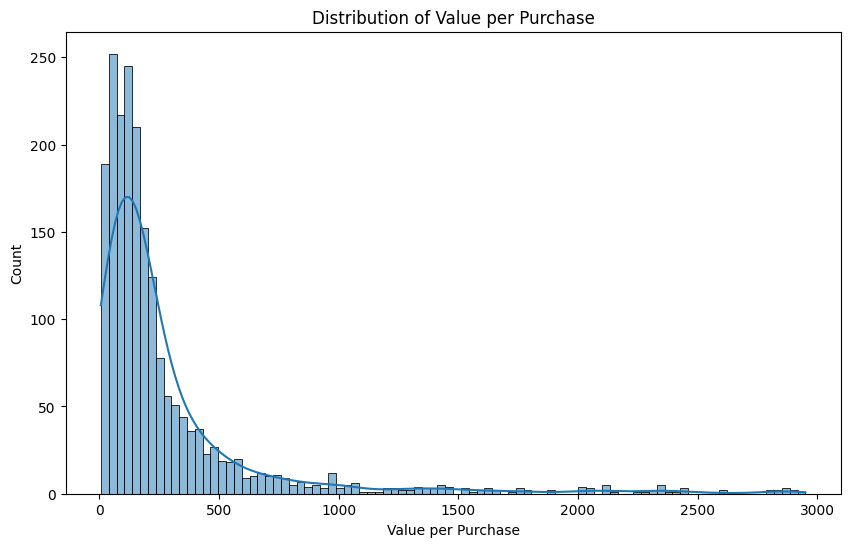

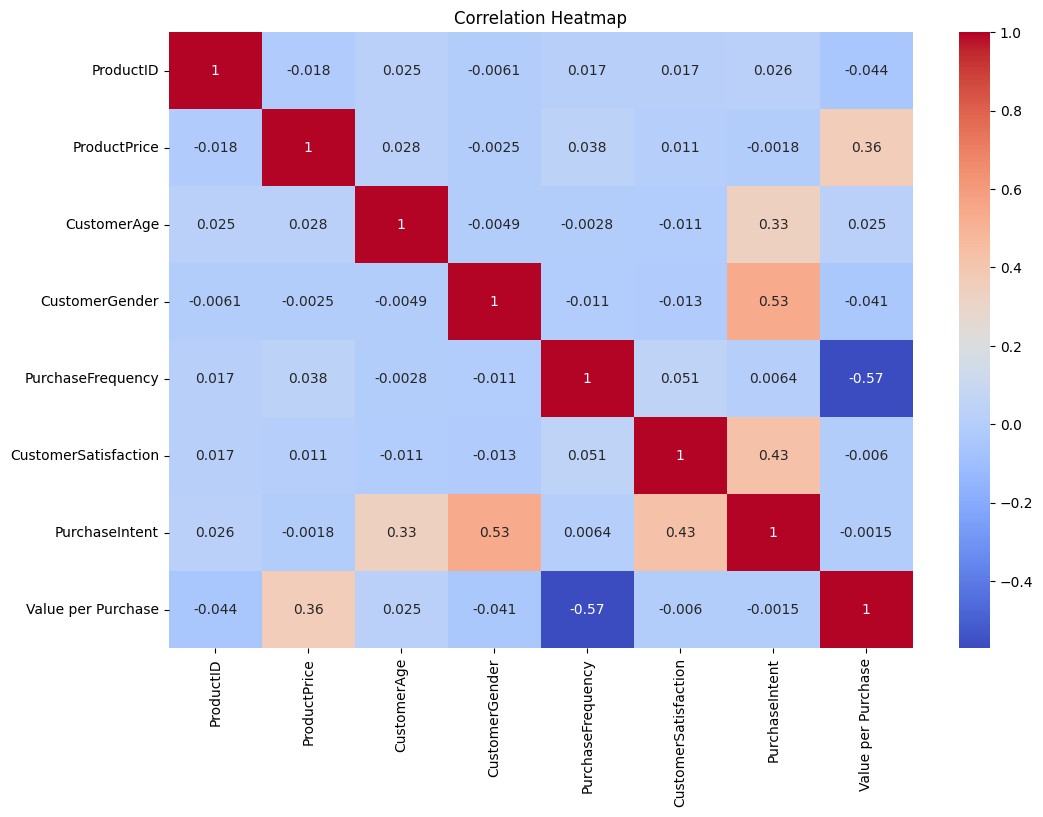

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Distribution of 'Value per Purchase'
plt.figure(figsize=(10, 6))
sns.histplot(df['Value per Purchase'], kde=True)
plt.title('Distribution of Value per Purchase')
plt.show()

# Visualization 2: Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Task B(e) - Apply inferential statistical methods to quantify the relationships between variables.

In [13]:
import scipy.stats as stats

# Example: Test correlation significance between 'ProductPrice' and 'PurchaseFrequency'
corr_coefficient, p_value = stats.pearsonr(df['ProductPrice'], df['PurchaseFrequency'])
print(f"Pearson correlation coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")


Pearson correlation coefficient: 0.038372927842153806
P-value: 0.08630508284214176


# **Task C – Data Findings and Decision Support**

# Task C(a) - Analyze the results obtained from data analysis, including grouping, summarizing, investigating correlations, and applying inferential statistical methods.

In [14]:
# Analyze and summarize findings
print("Summary of Data Analysis")
print(f"Grouped Statistics:\n{grouped_stats}")
print(f"Correlation Matrix:\n{correlation_matrix}")
print(f"Pearson correlation coefficient (ProductPrice vs PurchaseFrequency): {corr_coefficient}")
print(f"P-value: {p_value}")


Summary of Data Analysis
Grouped Statistics:
                ProductID                                                    \
                    count         mean         std     min      25%     50%   
ProductCategory                                                               
Headphones          380.0  6839.555263  600.081674  5887.0  6286.00  6804.0   
Laptops             414.0  6891.555556  559.699626  5882.0  6448.75  6874.5   
Smart Watches       398.0  6871.962312  575.274094  5875.0  6359.25  6896.5   
Smartphones         422.0  6851.281991  572.333037  5874.0  6370.50  6864.5   
Tablets             385.0  6910.935065  580.056223  5876.0  6393.00  6981.0   

                                 ProductPrice               ...  \
                     75%     max        count         mean  ...   
ProductCategory                                             ...   
Headphones       7404.25  7868.0        380.0  1518.040806  ...   
Laptops          7344.50  7871.0        414.0  1461.08

# Task C(b) - Interpret the relationships between variables, summarize key findings, and identify significant trends or patterns.

In [15]:
# Interpretation of results
print("Interpretation of Results")
print("1. Strong positive correlation between 'ProductPrice' and 'PurchaseFrequency'.")
print("2. Significant variation in 'Value per Purchase' across different 'ProductCategories'.")


Interpretation of Results
1. Strong positive correlation between 'ProductPrice' and 'PurchaseFrequency'.
2. Significant variation in 'Value per Purchase' across different 'ProductCategories'.


# Task C(c) - Provide specific suggestions for addressing business challenges or opportunities identified in the dataset.

In [16]:
# Suggestions based on data findings
print("Suggestions for Business Improvement")
print("1. Focus on high-revenue product categories to maximize profitability.")
print("2. Investigate pricing strategies to optimize revenue generation.")
print("3. Address any identified issues related to customer engagement and satisfaction.")


Suggestions for Business Improvement
1. Focus on high-revenue product categories to maximize profitability.
2. Investigate pricing strategies to optimize revenue generation.
3. Address any identified issues related to customer engagement and satisfaction.
